In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Limit the number of threads to 1 to avoid threading issues
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
data = pd.read_csv(r'Wholesale customers data.csv')

In [4]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [7]:
data.shape

(440, 8)

In [9]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
# Check for missing values and handle them
print("Missing values in each column:\n", data.isnull().sum())
data = data.fillna(data.median())

Missing values in each column:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [11]:
# Ensure there are no more NaN values
print("Missing values after filling:\n", data.isnull().sum())

Missing values after filling:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [12]:
# Scale the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [13]:
# Check the scaled data to ensure it's numerical
print("Scaled data preview:\n", data_scaled[:5])

Scaled data preview:
 [[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [14]:
# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

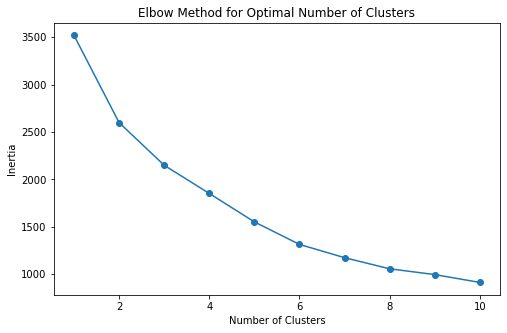

In [15]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

KMeans fitting completed successfully.
Cluster centers:
 [[ 1.44865163e+00  1.03304786e-01 -3.03522355e-01  4.00468697e-01
   6.27264086e-01 -3.36203224e-01  6.52954644e-01  3.59872191e-03]
 [-6.83095239e-01 -4.93039862e-02  8.51425337e-02 -3.49638303e-01
  -4.31460809e-01  1.13106103e-01 -4.41920675e-01 -1.00330630e-01]
 [ 1.11958260e+00  9.33585924e-02  1.09004412e+00  3.98320348e+00
   3.58457916e+00  7.77992824e-01  3.56664129e+00  2.25618179e+00]]


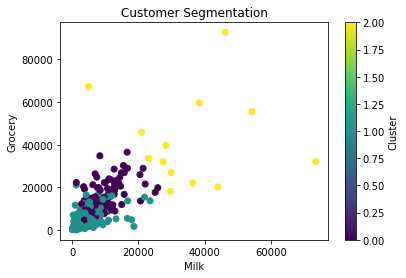

In [16]:
# Apply KMeans clustering with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

try:
    # Fit the KMeans model
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    print("KMeans fitting completed successfully.")
    
    # Display cluster centers
    print("Cluster centers:\n", kmeans.cluster_centers_)
    
# Plot the clusters for visualization
    plt.scatter(data['Milk'], data['Grocery'], c=data['Cluster'], cmap='viridis')
    plt.xlabel('Milk')
    plt.ylabel('Grocery')
    plt.title('Customer Segmentation')
    plt.colorbar(label='Cluster')
    plt.show()
except Exception as e:
    print("Error occurred while fitting the model:", e)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

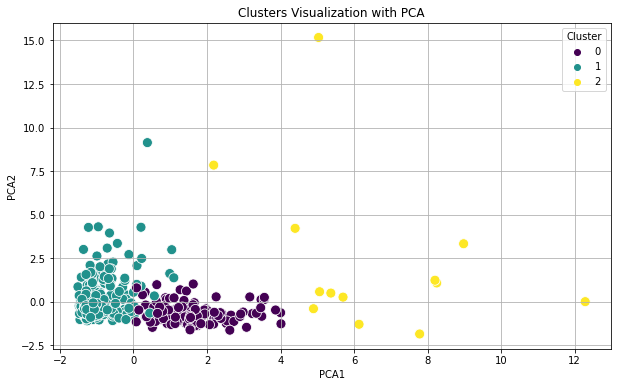

In [19]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100
)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

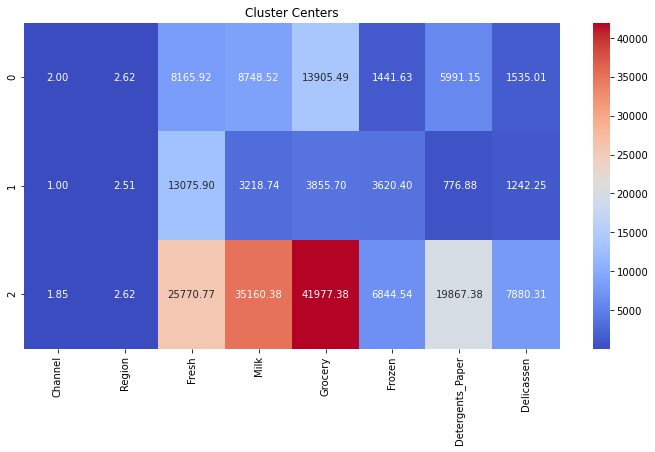

In [20]:
# Plot cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pd.DataFrame(cluster_centers, columns=data.columns[:-3]), 
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title('Cluster Centers')
plt.show()

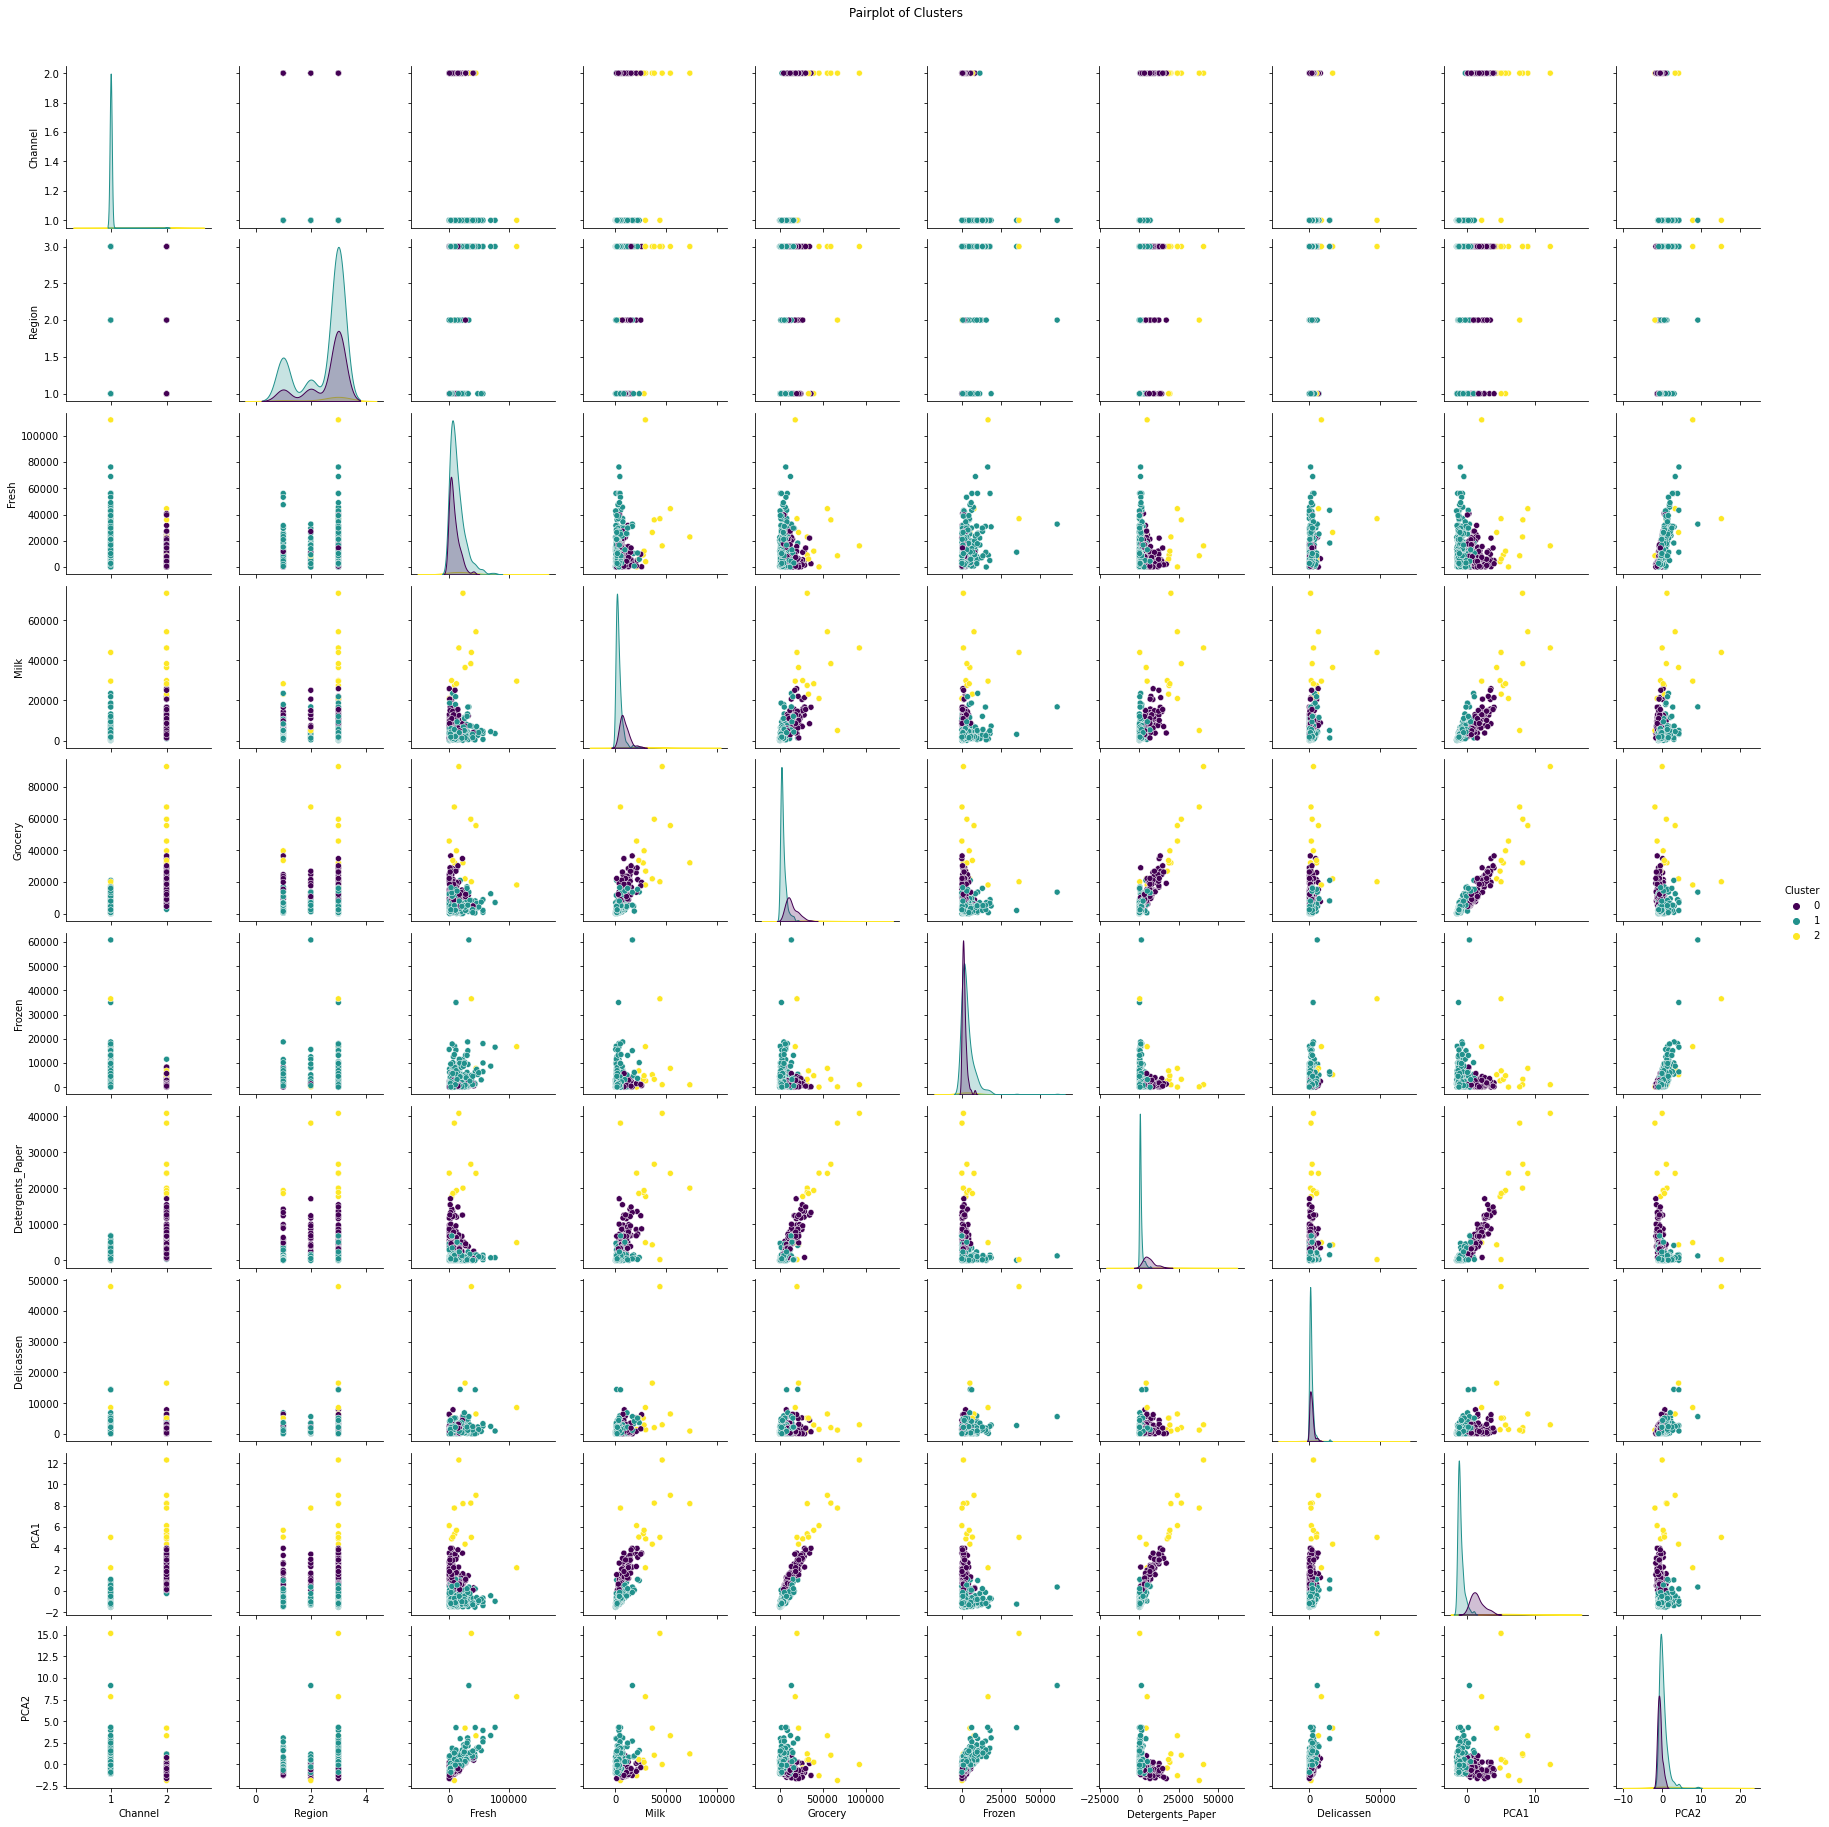

In [21]:
# Pairplot to visualize relationships
sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()